In [6]:
#Xception Model
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications import Xception

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import os

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1.0/255.)

train_generator = train_datagen.flow_from_directory(
        '/kaggle/input/malayakew-plant-leaf-dataset/MK/D2/train_patch',
        target_size=(256, 256),
        batch_size=32,
        class_mode='categorical')
test_generator = test_datagen.flow_from_directory(
    '/kaggle/input/malayakew-plant-leaf-dataset/MK/D2/test_patch',
    target_size=(256,256),
    batch_size=32,
    class_mode='categorical')

# Load the pre-trained Xception model with ImageNet weights
base_model = Xception(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Add some layers on top of the base model for classification
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.2)(x)
predictions = layers.Dense(44, activation='softmax')(x)

# Create the final model to train
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the weights of the pre-trained layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define the checkpoint path and directory
checkpoint_path = "/kaggle/working/Xception.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Define the callbacks for early stopping and saving checkpoints
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=4, monitor='val_loss'),
    tf.keras.callbacks.ModelCheckpoint(
                                filepath=checkpoint_path,
                                verbose=1,
                                save_weights_only=True,
                                period=2)
]

Found 34672 images belonging to 44 classes.
Found 8800 images belonging to 44 classes.
83683744/83683744 [==============================] - 4s 0us/step


In [7]:
# Train the model
history = model.fit_generator(train_generator,
                              epochs=20,
                              validation_data=test_generator,
                              callbacks=callbacks,
                              verbose=1)

/tmp/ipykernel_32/104450385.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/20
1084/1084 [==============================] - 784s 714ms/step - loss: 2.4010 - accuracy: 0.3242 - val_loss: 1.5526 - val_accuracy: 0.5491
Epoch 2/20
1084/1084 [==============================] - ETA: 0s - loss: 1.5976 - accuracy: 0.5260
Epoch 2: saving model to /kaggle/working/Xception.ckpt
1084/1084 [==============================] - 536s 495ms/step - loss: 1.5976 - accuracy: 0.5260 - val_loss: 1.2262 - val_accuracy: 0.6345
Epoch 3/20
1084/1084 [==============================] - 526s 485ms/step - loss: 1.3672 - accuracy: 0.5907 - val_loss: 1.0460 - val_accuracy: 0.6943
Epoch 4/20
1084/1084 [==============================] - ETA: 0s - loss: 1.2375 - accuracy: 0.6290
Epoch 4: saving model to /kaggle/working/Xception.ckpt
1084/1084 [==============================] - 519s 479ms/step - loss: 1.2375 - accuracy: 0.6290 - val_loss: 0.9260 - val_accuracy: 0.7232
Epoch 5/20
1084/1084 [==============================] - 525s 484ms/step - loss: 1.1444 - accuracy: 0.6567 - val_loss: 0.8509

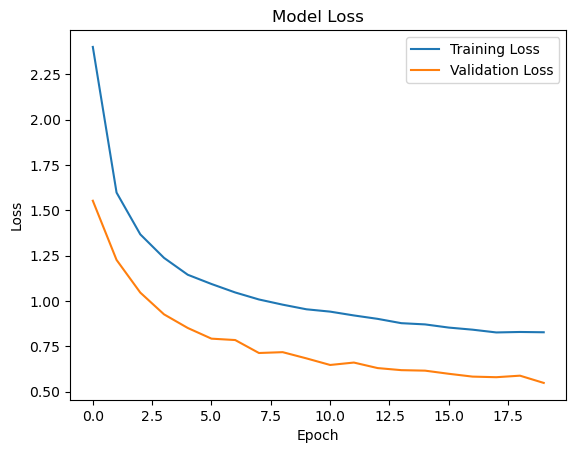

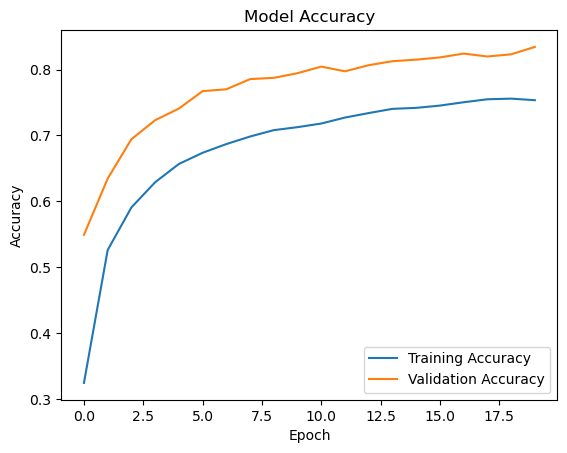

In [8]:
# Plot the training loss and validation loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

# Plot the training accuracy and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
plt.show()

In [10]:
# ...
import numpy as np

# After training, use the model to make predictions on test data
predictions = model.predict(test_generator)

# Define a dictionary to map class indices to class names
class_labels = {
    0: 'q_aff_cerris',
    1: 'q_rubur_f_purpubascens',
    2: 'q_x_hispanica',
    3: 'q_x_kewensis',
    4: 'q_x_ludoviciana',
    5: 'q_x_mannifera',
    6: 'q_x_rosacea',
    7: 'q_x_turneri',
    8: 'qacutissima',
    9: 'qagriefolia',
    10: 'qagrifolia',
    11: 'qarkansana',
    12: 'qboissieri',
    13: 'qcanariensis',
    14: 'qcastaneifolia',
    15: 'qcerris',
    16: 'qellipsoidalis',
    17: 'qfrainetto',
    18: 'qhartwissiana',
    19: 'qhemisphaerica',
    20: 'qhybrid',
    21: 'qilex',
    22: 'qinfectoria',
    23: 'qithaburensis',
    24: 'qlaurifolia',
    25: 'qlobata',
    26: 'qmacransmera',
    27: 'qmarilandica',
    28: 'qoxyodon',
    29: 'qpetraea',
    30: 'qpetraer_fmespilikolia',
    31: 'qphellos',
    32: 'qpubescens',
    33: 'qreticulata',
    34: 'qrhysophylla',
    35: 'qrobur',
    36: 'qrotundifolia',
    37: 'qrubra',
    38: 'qrulstra_aurea',
    39: 'qserrata',
    40: 'qshumardii',
    41: 'qtrotana',
    42: 'quercus',
    43: 'qvariabilis'
}

# Loop through the predictions and print the results with class names
for i, prediction in enumerate(predictions):
    predicted_class_index = np.argmax(prediction)
    predicted_class = class_labels[predicted_class_index]
    probability = prediction[predicted_class_index]
    
    print(f"Image {i + 1}: Predicted Class: {predicted_class}, Probability: {probability:.4f}")


275/275 [==============================] - 26s 93ms/step
Image 1: Predicted Class: qoxyodon, Probability: 0.7475
Image 2: Predicted Class: qinfectoria, Probability: 0.9987
Image 3: Predicted Class: qlobata, Probability: 0.9815
Image 4: Predicted Class: qagriefolia, Probability: 0.9978
Image 5: Predicted Class: q_x_kewensis, Probability: 0.8915
Image 6: Predicted Class: qhybrid, Probability: 0.6063
Image 7: Predicted Class: qrotundifolia, Probability: 0.9586
Image 8: Predicted Class: qlobata, Probability: 0.9056
Image 9: Predicted Class: qmarilandica, Probability: 0.9882
Image 10: Predicted Class: qcanariensis, Probability: 0.9610
Image 11: Predicted Class: qboissieri, Probability: 0.8654
Image 12: Predicted Class: qrotundifolia, Probability: 0.7862
Image 13: Predicted Class: qellipsoidalis, Probability: 0.9859
Image 14: Predicted Class: qellipsoidalis, Probability: 0.9963
Image 15: Predicted Class: q_rubur_f_purpubascens, Probability: 1.0000
Image 16: Predicted Class: q_x_mannifera, Pr